In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import fitsio
import pandas as pd
import os
import glob

In [2]:
t = Table.read("/home/diana/desida/bin/tiny_edr/spectro/redux/fuji/tiles/cumulative/31/20210413/redrock-0-31-thru20210413.fits")

In [4]:
galaxies = t[t['SPECTYPE'] == 'GALAXY']
qsos = t[t['SPECTYPE'] == 'QSO']
stars = t[t['SPECTYPE'] == 'STAR']

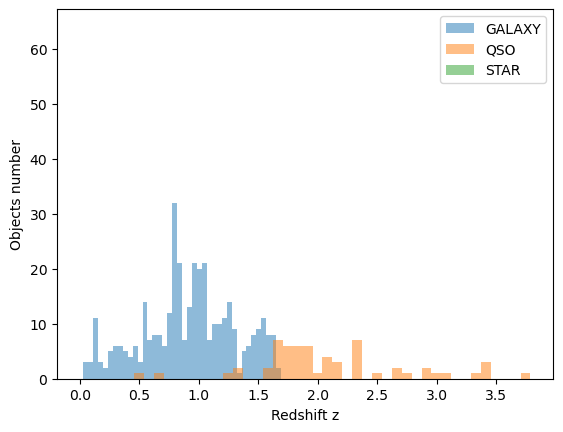

In [11]:
plt.hist(galaxies['Z'], bins=40, alpha=0.5, label='GALAXY')
plt.hist(qsos['Z'], bins=40, alpha=0.5, label='QSO')
plt.hist(stars['Z'], bins=40, alpha=0.5, label='STAR')
plt.xlabel("Redshift z")
plt.ylabel("Objects number")
plt.legend()
plt.show()

In [12]:
mask = t[t['ZWARN'] == 0]

galaxies = mask[mask['SPECTYPE'] == 'GALAXY']
qsos = mask[mask['SPECTYPE'] == 'QSO']
stars = mask[mask['SPECTYPE'] == 'STAR']

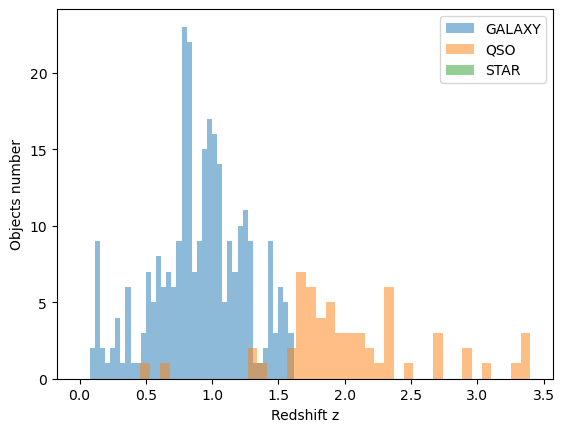

In [13]:
plt.hist(galaxies['Z'], bins=40, alpha=0.5, label='GALAXY')
plt.hist(qsos['Z'], bins=40, alpha=0.5, label='QSO')
plt.hist(stars['Z'], bins=40, alpha=0.5, label='STAR')
plt.xlabel("Redshift z")
plt.ylabel("Objects number")
plt.legend()
plt.show()


# what info contains?

In [14]:
filename = '/home/diana/desida/bin/tiny_edr/spectro/redux/fuji/tiles/cumulative/33/20210417/redrock-6-33-thru20210417.fits'
fits = fitsio.FITS(filename)

print(fits)

print(fits[1].get_colnames())


  file: /home/diana/desida/bin/tiny_edr/spectro/redux/fuji/tiles/cumulative/33/20210417/redrock-6-33-thru20210417.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      REDSHIFTS
  2      BINARY_TBL      FIBERMAP
  3      BINARY_TBL      EXP_FIBERMAP
  4      BINARY_TBL      TSNR2
['TARGETID', 'Z', 'ZERR', 'ZWARN', 'CHI2', 'COEFF', 'NPIXELS', 'SPECTYPE', 'SUBTYPE', 'NCOEFF', 'DELTACHI2']


# Sky map

In [15]:
base_path = '/home/diana/desida/bin/tiny_edr/spectro/redux/fuji/tiles/cumulative/'

files = glob.glob(os.path.join(base_path, '*', '*', 'redrock-*.fits'))

data = fitsio.read(files[0], ext=2)  # ext=2 is FIBERMAP in zmtl
print(data.dtype.names)

('TARGETID', 'PETAL_LOC', 'DEVICE_LOC', 'LOCATION', 'FIBER', 'COADD_FIBERSTATUS', 'TARGET_RA', 'TARGET_DEC', 'PMRA', 'PMDEC', 'REF_EPOCH', 'LAMBDA_REF', 'FA_TARGET', 'FA_TYPE', 'OBJTYPE', 'FIBERASSIGN_X', 'FIBERASSIGN_Y', 'PRIORITY', 'SUBPRIORITY', 'OBSCONDITIONS', 'RELEASE', 'BRICKNAME', 'BRICKID', 'BRICK_OBJID', 'MORPHTYPE', 'EBV', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'FIBERTOTFLUX_G', 'FIBERTOTFLUX_R', 'FIBERTOTFLUX_Z', 'MASKBITS', 'SERSIC', 'SHAPE_R', 'SHAPE_E1', 'SHAPE_E2', 'REF_ID', 'REF_CAT', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'PARALLAX', 'PHOTSYS', 'PRIORITY_INIT', 'NUMOBS_INIT', 'SV3_DESI_TARGET', 'SV3_BGS_TARGET', 'SV3_MWS_TARGET', 'SV3_SCND_TARGET', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'PLATE_RA', 'PLATE_DEC', 'TILEID', 'COADD_NUMEXP', 'COADD_EXPTIME', 'COADD_NUMNIGHT', 'COADD_NUMTILE', 'MEAN_DEL

In [ ]:
all_ra = []
all_dec = []
all_spectype = []

for file in files:  # list of routes redrock-*.fits
    redshifts = fitsio.read(file, ext=1)  # REDSHIFTS
    fibermap = fitsio.read(file, ext=2)   # FIBERMAP

    # create dictionary to search RA and DEC by TARGETID
    ra_dict = {tid: ra for tid, ra in zip(fibermap['TARGETID'], fibermap['TARGET_RA'])}
    dec_dict = {tid: dec for tid, dec in zip(fibermap['TARGETID'], fibermap['TARGET_DEC'])}

    for entry in redshifts:
        tid = entry['TARGETID']
        if tid in ra_dict and tid in dec_dict:
            all_ra.append(ra_dict[tid])
            all_dec.append(dec_dict[tid])
            all_spectype.append(entry['SPECTYPE'].strip())


all_ra = np.array(all_ra)
all_dec = np.array(all_dec)
all_spectype = np.array(all_spectype)

In [ ]:
unique_types, counts = np.unique(all_spectype, return_counts=True)

for stype, count in zip(unique_types, counts):
    label = stype
    print(f"{label}: {count}")

GALAXY: 7038
QSO: 870
STAR: 2092


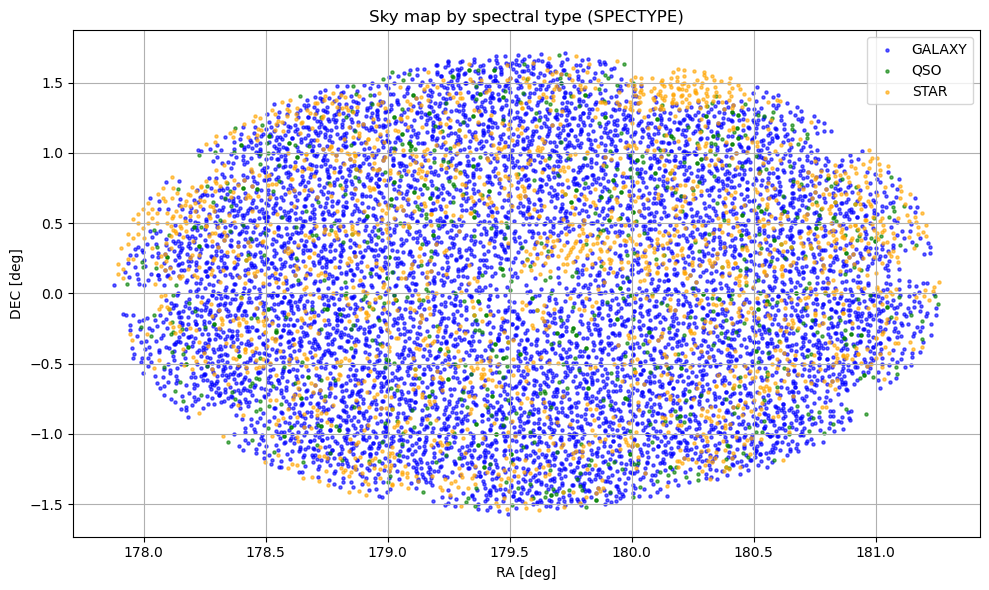

In [18]:
plt.figure(figsize=(10, 6))

for label, color in zip(['GALAXY', 'QSO', 'STAR'], ['blue', 'green', 'orange']):
    mask = all_spectype == label
    plt.scatter(all_ra[mask], all_dec[mask], s=5, alpha=0.6, label=label, color=color)

plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
plt.title("Sky map by spectral type (SPECTYPE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()